In [1]:
#匯入套件
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#下載資料集
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data() #將boston_housing資料集分別指派到4個變數中

57344/57026 [==============================] - 0s 0us/step


In [3]:
#檢視資料集的型別
print(type(train_data))
print(type(train_labels))
print(type(test_data))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#檢視資料集的shape
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [5]:
print(train_data[0:5])

[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [3.96100e-02 0.00000e+00 5.19000e+00 0.00000e+00 5.15000e-01 6.03700e+00
  3.45000e+01 5.98530e+00 5.00000e+00 2.24000e+02 2.02000e+01 3.96900e+02
  8.01000e+00]
 [3.69311e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.37600e+00
  8.84000e+01 2.56710e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.91430e+02
  1.46500e+01]]


In [6]:
#檢視訓練資料
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']  # 設定表頭
df = pd.DataFrame(train_data, columns=column_names)#建立DataFrame
df.head() #列出前5筆

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [7]:
#檢視前 5 筆訓練標籤
print(train_labels[0:5])

[15.2 42.3 50.  21.1 17.7]


In [8]:
#將訓練資料與訓練標籤洗牌
order = np.random.randint(0,404, size=404)
train_data = train_data[order]
train_labels = train_labels[order]

#進行資料集的正規化處理
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [9]:
#檢視資料集內經過預處理的資料
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.112819,-0.487559,0.997990,-0.189466,-0.259287,-0.704475,-1.114189,0.232639,1.713531,1.600383,0.805463,0.388260,-0.361704
1,-0.438760,-0.487559,-0.123109,5.277987,-0.626913,-0.635033,-0.620935,0.004584,-0.626789,-0.812574,0.122194,0.364969,0.387283
2,-0.448949,-0.487559,-0.123109,5.277987,-0.626913,-0.238444,-0.427288,0.304734,-0.626789,-0.812574,0.122194,0.251805,0.204375
3,-0.460708,0.778863,0.541191,-0.189466,-0.840649,0.344868,-0.628243,0.011389,-0.626789,-0.855995,-0.048624,0.412846,-0.663435
4,-0.423234,-0.487559,-0.602300,-0.189466,-0.592715,0.303202,-1.121497,0.551312,-0.509773,-0.750545,0.549237,0.435079,-0.935794
5,-0.461011,-0.487559,-0.929225,-0.189466,-0.404628,-0.280109,-1.326106,1.198175,-0.509773,-1.141332,0.805463,0.435079,-0.683461
6,-0.282609,-0.487559,1.218925,-0.189466,0.364822,1.960547,0.730945,-0.855905,-0.509773,-0.031000,-1.543276,0.170755,-1.521899
7,-0.455618,-0.487559,0.373996,-0.189466,-1.071484,-0.141225,-1.914357,0.951239,-0.626789,-0.738139,-0.988120,0.435079,-0.607361
8,-0.424646,-0.487559,1.563764,-0.189466,0.527261,-0.611886,0.899017,-0.600578,-0.626789,0.179902,1.232507,0.338501,0.253773
9,0.088157,-0.487559,0.997990,-0.189466,0.185284,-0.332576,0.866133,-0.564555,1.713531,1.600383,0.805463,-0.336719,1.093546


In [10]:
# 建構模型
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(13,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [11]:
# 編譯模型
model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])

In [12]:
# 設定 Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)

In [13]:
# # 訓練
history = model.fit(train_data, train_labels, batch_size=32, epochs=500, 
    validation_split=0.2, callbacks=[early_stop])


Epoch 1/500
11/11 [==============================] - 2s 36ms/step - loss: 545.2080 - mae: 21.6583 - val_loss: 470.8382 - val_mae: 20.5497
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 521.3804 - mae: 21.3337 - val_loss: 454.8758 - val_mae: 20.1940
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 531.2384 - mae: 21.4170 - val_loss: 438.9417 - val_mae: 19.8304
Epoch 4/500
11/11 [==============================] - 0s 4ms/step - loss: 485.5806 - mae: 20.4908 - val_loss: 421.7720 - val_mae: 19.4275
Epoch 5/500
11/11 [==============================] - 0s 5ms/step - loss: 459.7282 - mae: 19.8873 - val_loss: 403.2320 - val_mae: 18.9817
Epoch 6/500
11/11 [==============================] - 0s 5ms/step - loss: 482.1697 - mae: 20.1597 - val_loss: 382.2363 - val_mae: 18.4647
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: 428.6069 - mae: 19.1698 - val_loss: 358.7602 - val_mae: 17.8731
Epoch 8/500
11/11 [=====================

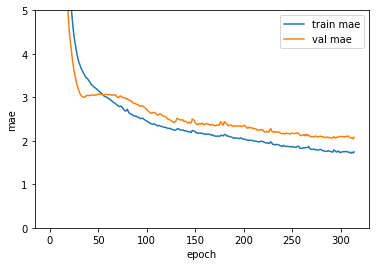

In [14]:
# 繪製圖形
#plt.plot(history.history['mean_absolute_error'], label='train mae') #tensorflow2.0 以下的寫法
#plt.plot(history.history['val_mean_absolute_error'], label='val mae') #tensorflow2.0 以下的寫法
plt.plot(history.history['mae'], label='train mae') #tensorflow2.0 的寫法
plt.plot(history.history['val_mae'], label='val mae') #tensorflow2.0 的寫法
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(loc='best')
plt.ylim([0,5])
plt.show()

In [15]:
# 評估
test_loss, test_mae = model.evaluate(test_data, test_labels)
print('loss:{:.3f}\nmae: {:.3f}'.format(test_loss, test_mae))

4/4 [==============================] - 0s 3ms/step - loss: 22.3436 - mae: 3.2488
loss:22.344
mae: 3.249


In [16]:
# 顯示預測的價格
print('前 10 筆測試標籤:',np.round(test_labels[0:10]))

# 顯示預測結果的價格
test_predictions = model.predict(test_data[0:10]).flatten()
print('前 10 筆預測結果:',np.round(test_predictions))

前 10 筆測試標籤: [ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
前 10 筆預測結果: [ 8. 18. 21. 37. 24. 19. 26. 22. 19. 26.]
